# Quantum Teleportation
## theoretical aspect
let $\Psi$ be the qubit Quantum state of ALEX. ALEX wants to teleport her qubit state $\Psi$ to BOB. The problem is Alex do not know her own quantum state. If Alex go ahead and measure the message, she will collape in to either $| 1 \rangle$ or $| 0 \rangle$. One more important information is that Alex and BOB share an engtangle quantum qubit.

$| \Psi \rangle = a*|0\rangle +b* |1\rangle$ be the quantum state that ALEX does not know and she want to sent this quantum state to BOB.

The set up is as follow

1 : $| \Psi \rangle$---------------------------------

2 : $| 0 \rangle$---------------------------------

3 : $| 0 \rangle$---------------------------------



where the 2 qubit are engtangle

In [1]:
import qiskit as q
import matplotlib as mpl
#q.IBMQ.save_account("your_account.txt","r") this will save your IBM quantum computing account
q.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
provider= q.IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count= len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} quered and {qubit_count} qubits")

ibmq_qasm_simulator has 5 quered and simulated qubits
ibmq_lima has 53 quered and 5 qubits
ibmq_belem has 57 quered and 5 qubits
ibmq_quito has 63 quered and 5 qubits
simulator_statevector has 5 quered and simulated qubits
simulator_mps has 5 quered and simulated qubits
simulator_extended_stabilizer has 5 quered and simulated qubits
simulator_stabilizer has 5 quered and simulated qubits
ibmq_manila has 51 quered and 5 qubits
ibm_nairobi has 163 quered and 7 qubits
ibm_oslo has 61 quered and 7 qubits


In [3]:
n_qubit=q.QuantumRegister(3)
n_classic=q.ClassicalRegister(3)
circuit= q.QuantumCircuit(n_qubit,n_classic)

In [4]:
circuit.h(1)
circuit.cnot(1,2)

In [5]:
circuit.cnot(0,1)
circuit.h(0)


In [6]:
circuit.measure([0,1],[0,1])

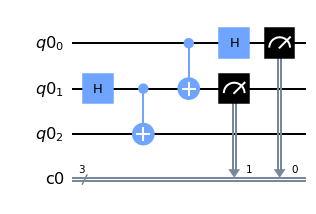

In [7]:
circuit.draw('mpl')

In [ ]:
result= q.execute(circuit, backend= q.Aer.get_backend('simulator_statevector'), shots=1000).result()